TODO: 
- [x] write code to generate each figure. 
- [ ] commment code and make it neat
- [ ] write explanations and figure captions.

# Agile quantum cryptography and non-classical state generation
Matthew Thornton, PhD Thesis.
University of St Andrews.


This Jupyter notebook contains all code sufficient to reproduce images from Chapter 6 of the Thesis. Specifically, we implement numerical methods to reproduce the following figures: $6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 6.10, 6.11, 6.12, 6.13, 6.14, 6.18$ and $E.1$.

All code required to reproduce these figures is on display, and I have included the figure captions from the Thesis in the relevant sections. This notebook should be read alongside the Thesis.

For convenience, I make extensive use of the open source package `qutip`: http://qutip.org/ and am indebted to the developers.

In [1]:
import matplotlib 
import numpy
import qutip
import os

This notebook is generated with the following package versions:

In [2]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, and Boxi Li
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.2
Numpy Version:      1.19.1
Scipy Version:      1.5.2
Cython Version:     0.29.21
Matplotlib Version: 3.3.1
Python Version:     3.7.9
Number of CPUs:     16
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Windows (AMD64)
Installation path:  C:\Users\mt45\.conda\envs\myqutip\lib\site-packages\qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


and all commented timings are approximate for a desktop computer with the following specs:
- OS: Windows 10 Pro
- Processor: Intel(R) Core(TM) i9-9900T CPU @ 2.10GHz
- RAM: 16.0 GB

Graphs in the Thesis were generated on a desktop computer with the following specs:
- OS: Windows 10 Home
- Processor: Intel(R) Core(TM) i5-3230M CPU @ 2.60GHz
- RAM: 8.0 GB


Please run cells within an individual section in order. I will add comments or notes when necessary for the code's running.
Please note that function names and global variables are re-used in this notebook. Please take care if executing code out of order, and let me know if there are any issues: mt45@st-andrews.ac.uk

In [3]:
# a neat little progress bar which will help keep us sane when things take a while to run

import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

## Chapter 6

In [4]:
# def purity(rho):
#     """
#     Calculate the purity of a quantum density matrix.
#     """
#     if isinstance(rho, list):
#         mylist = []
#         for idx, val in enumerate(rho):
#             mylist.append(((val * val).tr()))
#         return mylist
#     else:
#         return (rho * rho).tr()

## Section 6.2

### Figure 6.3: $\hat{A} = \hat{a}$

In [4]:
# defining input parameters
N = 35 # hilbert space size
tlist = numpy.linspace(0, 1.0, 101) # times over which to solve
gamma = 8.0 # decay rate. 
omega = 0.0 # free Hamiltonian frequency. Set to 0 without loss of generality.
alphain = 3.0 # input coherent state amplitude

# defining operators
a = qutip.destroy(N) # annihilation operator
n = qutip.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/numpy.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/numpy.sqrt(2) # momentum operator. Equivalent to qt.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qutip.coherent(N, alphain, method="analytic")
coplist = [numpy.sqrt(gamma) * a]
result = qutip.mesolve(H, psi0, tlist, coplist, [])

# result.states gives a list of density matrices, corresponding to 
# the state at each timestep.


# timing: 51ms

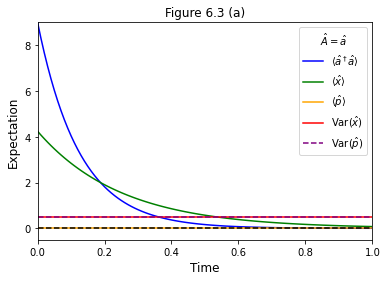

In [5]:
# graph of expectations

const_list_0 = numpy.full(len(tlist), 0)


ymax = max(qutip.expect(n, result.states))
fig, ax = matplotlib.pyplot.subplots(figsize=(6,4))

ax.plot(tlist, qutip.expect(n, result.states), label="$\\langle\\hat{a}^\\dagger \\hat{a} \\rangle$", color="blue")
ax.plot(tlist, qutip.expect(x, result.states), label="$\\langle\\hat{x}\\rangle$", color="green")
ax.plot(tlist, qutip.expect(p, result.states), label="$\\langle\\hat{p}\\rangle$", color="orange")
ax.plot(tlist, qutip.variance(x, result.states), label="Var($\\hat{x}$)", color="red")
ax.plot(tlist, qutip.variance(p, result.states), label="Var($\\hat{p}$)", linestyle="--", color="purple")
ax.plot(tlist, const_list_0, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Expectation")
ax.legend(title = "$\\hat{A} = \\hat{a}$", loc=0)
ax.set(title="Figure 6.3 (a)")
ax.autoscale(tight=True)
ax.set_ylim([-0.5,ymax]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

In [14]:
# graph of fidelities to target states

steady_state = qutip.coherent(N, 0, method="analytic")
const_list_1 = numpy.full(len(tlist), 1)

# fidelity to steady state
fid_list_steady = []
for idx, val in enumerate(result.states):
    fid_list_steady.append(qutip.fidelity(val, steady_state))
    
    
# fidelity to equivalent coherent state
fid_list_coh = []
for idx, val in enumerate(result.states):
    fid_list_coh.append(qutip.fidelity(val, qutip.coherent(N, numpy.sqrt(qutip.expect(n, val)))))
    

fid_list_one = []
for idx, val in enumerate(result.states):
    fid_list_one.append(qutip.fidelity(val, qutip.fock(N, 1)))

fid_list_fock = []
for idx, val in enumerate(result.states):
    fid_list_fock.append(qutip.fidelity(val, qutip.fock(N, int(numpy.rint(qutip.expect(n, val))))))
    
    
# timing: 423ms.

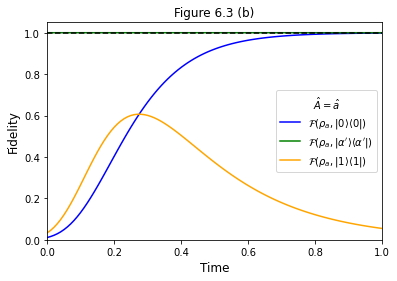

In [20]:
fig, ax = matplotlib.pyplot.subplots(figsize=(6, 4))
ax.plot(tlist, fid_list_steady, label="$\\mathcal{F}\\left(\\rho_a, |0\\rangle\\langle 0 |\\right)$", color="blue")
ax.plot(tlist, fid_list_coh, label="$\\mathcal{F}\\left(\\rho_a, |\\alpha^\\prime\\rangle\\langle \\alpha^\\prime |\\right)$", color="green")
ax.plot(tlist, fid_list_one, label="$\\mathcal{F}\\left(\\rho_a, |1\\rangle\\langle 1|\\right)$", color="orange")
ax.plot(tlist, const_list_1, linestyle="--", color="black")
ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
ax.set(title="Figure 6.3 (b)")
ax.set_ylim([0, 1.05]);
ax.legend(title = "$\\hat{A} = \\hat{a}$", loc=0)



ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.3: $\hat{A} = \hat{a}$. (a) Operator expectation values calculated for state $\rho_a\left(t\right)$ as it evolves under master equation $6.3$. An initial coherent state with $\alpha = 3.0$ decays to vacuum state $|0\rangle\langle0|$. Quadrature variances remain constant through time, implying that $\rho_a$ remains a coherent state throughout its evolution. This is confirmed in (b) where the fidelity between $\rho_a$ and $|\alpha^\prime\rangle\langle\alpha^\prime|$ is demonstrated to remain $1$ for all time, while the fidelity to the vacuum state increases to $1$. The amplitude $\alpha^\prime$ is chosen to give a coherent state with equivalent photon-number expectation to $\rho_a\left(t\right)$. Horizontal gridlines are displayed in black, dashed. Numerical method: direct integration.

### Figure 6.4: $\hat{A} = \hat{a}^2$

In [5]:
# defining inumpyut parameters
N = 35 # hilbert space size
tlist = numpy.linspace(0, 1.0, 101) # times over which to solve
gamma = 8.0 # decay rate 
omega = 0.0 # free Hamiltonian frequency 
alphain = 3.0 # inumpyut coherent state amplitude

# defining operators
a = qutip.destroy(N) # annihilation operator
n = qutip.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/numpy.sqrt(2) # position operator. Equivalent to qutip.position(N)
p = -1j * (a - ad)/numpy.sqrt(2) # momentum operator. Equivalent to qutip.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qutip.coherent(N, alphain, method="analytic")
coplist = [numpy.sqrt(gamma) * a**2]
result = qutip.mesolve(H, psi0, tlist, coplist, [])

# timing: 9.07s

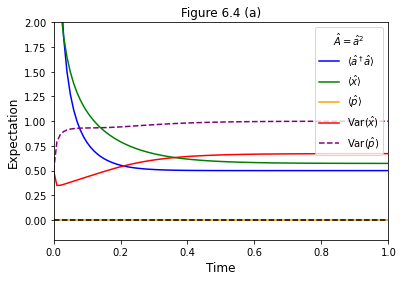

In [6]:
# graph of expectations

const_list_0 = numpy.full(len(tlist), 0)

ymax = max(qutip.expect(n, result.states))
fig, ax = matplotlib.pyplot.subplots(figsize=(6,4))

ax.plot(tlist, qutip.expect(n, result.states), label="$\\langle\\hat{a}^\\dagger \\hat{a} \\rangle$", color="blue")
ax.plot(tlist, qutip.expect(x, result.states), label="$\\langle\\hat{x}\\rangle$", color="green")
ax.plot(tlist, qutip.expect(p, result.states), label="$\\langle\\hat{p}\\rangle$", color="orange")
ax.plot(tlist, qutip.variance(x, result.states), label="Var($\\hat{x}$)", color="red")
ax.plot(tlist, qutip.variance(p, result.states), label="Var($\\hat{p}$)", linestyle="--", color="purple")
ax.plot(tlist, const_list_0, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Expectation")
ax.set(title="Figure 6.4 (a)")
ax.legend(title = "$\\hat{A} = \\hat{a}^2$", loc=1)
ax.autoscale(tight=True)
ax.set_ylim([-0.2, 2]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

In [7]:
def phase(alpha):
    return qutip.ket2dm((alpha * qutip.fock(N, 0)  + numpy.sqrt(1-alpha**2) * qutip.fock(N, 1)))

def phase2(c1, c2, c3):
    return c1 * phase(1/numpy.sqrt(2)) + c2 * qutip.ket2dm(qutip.basis(N, 0)) + c3 * qutip.ket2dm(qutip.basis(N, 1))

In [8]:
# graph of fidelities to target states

steady_state = phase2(0.810, 0.095, 0.095)
const_list_1 = numpy.full(len(tlist), 1)

# fidelity to steady state
fid_list_steady = []
for idx, val in enumerate(result.states):
    fid_list_steady.append(qutip.fidelity(val, steady_state))
    
    
# fidelity to equivalent coherent state
fid_list_coh = []
for idx, val in enumerate(result.states):
    fid_list_coh.append(qutip.fidelity(val, qutip.coherent(N, numpy.sqrt(qutip.expect(n, val)))))
    

fid_list_one = []
for idx, val in enumerate(result.states):
    fid_list_one.append(qutip.fidelity(val, qutip.fock(N, 1)))


fid_list_zero = []
for idx, val in enumerate(result.states):
    fid_list_zero.append(qutip.fidelity(val, qutip.fock(N, 0)))

# timing: 550ms

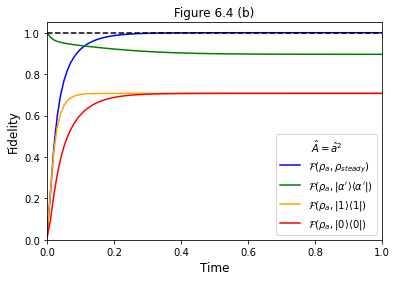

In [10]:
fig, ax = matplotlib.pyplot.subplots(figsize=(6,4))
    
ax.plot(tlist, fid_list_steady, label="$\\mathcal{F}\\left(\\rho_a, \\rho_{steady}\\right)$", color="blue")
ax.plot(tlist, fid_list_coh, label="$\\mathcal{F}\\left(\\rho_a, |\\alpha^\\prime\\rangle\\langle \\alpha^\\prime |\\right)$", color="green")
ax.plot(tlist, fid_list_one, label="$\\mathcal{F}\\left(\\rho_a, |1\\rangle\\langle 1|\\right)$", color="orange")
ax.plot(tlist, fid_list_zero, label="$\\mathcal{F}\\left(\\rho_a, |0\\rangle\\langle 0|\\right)$", color="red")                         
ax.plot(tlist, const_list_1, linestyle="--", color="black")
ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
ax.set(title="Figure 6.4 (b)")
ax.set_ylim([0, 1.05]);
ax.legend(title = "$\\hat{A} = \\hat{a}^2$", loc=0)


ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.4: $\hat{A} = \hat{a}^2$. (a) Operator expectation values for state $\rho_a\left(t\right)$ as it evolves under Eq. $6.7$. Unlike Fig. $6.3$, an initially coherent state with $\alpha=3.0$ no longer decays to the vacuum state, and the final photon-number expectation is $0.5$. Quadrature variances no longer stay constant, which implies that the state is no longer a coherent state. This is confirmed in (b), where the fidelity between $\rho_a\left(t\right)$ and $|\alpha^\prime\rangle\langle\alpha^\prime|$ is plotted. The fidelity between $\rho_a\left(t\right)$ and steady state Eq. $6.9$ increased to $1$. Horizontal gridlines are displayed in black, dashed. Numerical method: direct integration.

### Figure 6.5: $\hat{A} = \hat{a} \left(\hat{n} - 1\right)$

In [5]:
options=qutip.Options(nsteps=10000)

# defining input parameters
N = 35 # hilbert space size
tlist = numpy.linspace(0, 1.0, 101) # times over which to solve
gamma = 8.0 # decay rate 
omega = 0.0 # free Hamiltonian frequency 
alphain = 3.0 # inumpyut coherent state amplitude

# defining operators
a = qutip.destroy(N) # annihilation operator
n = qutip.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/numpy.sqrt(2) # position operator. Equivalent to qutip.position(N)
p = -1j * (a - ad)/numpy.sqrt(2) # momentum operator. Equivalent to qutip.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qutip.coherent(N, alphain, method="analytic")
coplist = [numpy.sqrt(gamma) * a*(n - 1)]
result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)

# timing: 41.1s

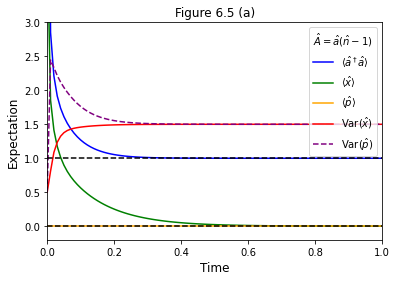

In [6]:
# graph of expectations

const_list_0 = numpy.full(len(tlist), 0)
const_list_1 = numpy.full(len(tlist), 1)

ymax = max(qutip.expect(n, result.states))
fig, ax = matplotlib.pyplot.subplots()

ax.plot(tlist, qutip.expect(n, result.states), label="$\\langle\\hat{a}^\\dagger \\hat{a} \\rangle$", color="blue")
ax.plot(tlist, qutip.expect(x, result.states), label="$\\langle\\hat{x}\\rangle$", color="green")
ax.plot(tlist, qutip.expect(p, result.states), label="$\\langle\\hat{p}\\rangle$", color="orange")
ax.plot(tlist, qutip.variance(x, result.states), label="Var($\\hat{x}$)", color="red")
ax.plot(tlist, qutip.variance(p, result.states), label="Var($\\hat{p}$)", linestyle="--", color="purple")
ax.plot(tlist, const_list_0, color="black", linestyle="--")
ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Expectation")
ax.set(title="Figure 6.5 (a)")
ax.legend(title = "$\\hat{A} = \\hat{a}\\left(\\hat{n} - 1\\right)$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.2, 3])

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

In [7]:
# graph of fidelities to target states

const_list_1 = numpy.full(len(tlist), 1)
    
# fidelity to equivalent coherent state
fid_list_coh = []
for idx, val in enumerate(result.states):
    fid_list_coh.append(qutip.fidelity(val, qutip.coherent(N, numpy.sqrt(qutip.expect(n, val)))))
    

fid_list_one = []
for idx, val in enumerate(result.states):
    fid_list_one.append(qutip.fidelity(val, qutip.fock(N, 1)))


fid_list_zero = []
for idx, val in enumerate(result.states):
    fid_list_zero.append(qutip.fidelity(val, qutip.fock(N, 0)))
    
# timing: 375ms

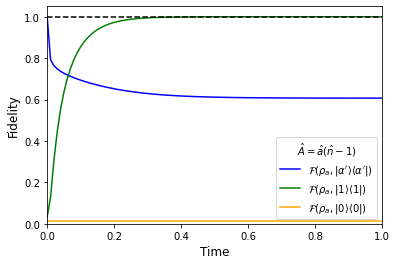

In [8]:
fig, ax = matplotlib.pyplot.subplots(figsize=(6,4))
    
ax.plot(tlist, fid_list_coh, label="$\\mathcal{F}\\left(\\rho_a, |\\alpha^\\prime\\rangle\\langle \\alpha^\\prime |\\right)$", color="blue")
ax.plot(tlist, fid_list_one, label="$\\mathcal{F}\\left(\\rho_a, |1\\rangle\\langle 1|\\right)$", color="green")
ax.plot(tlist, fid_list_zero, label="$\\mathcal{F}\\left(\\rho_a, |0\\rangle\\langle 0|\\right)$", color="orange")                      
ax.plot(tlist, const_list_1, linestyle="--", color="black")
ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
ax.set_ylim([0, 1.05]);
ax.legend(title = "$\\hat{A} = \\hat{a}\\left(\\hat{n}-1\\right)$", loc=0)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.5: $\hat{A} = \hat{a} \left(\hat{a}^\dagger \hat{a}-1\right)$. (a) Operator expectation values for state $\rho_a\left(t\right)$ as it evolves. An initially coherent state with $\alpha=3.0$ decays to a state with $\langle \hat{n}\rangle = 1$, which we confirm as state $|1\rangle\langle1|$ by considering the fidelity in (b). Horizontal gridlines are displayed in black, dashed. Numerical method: direct integration.

### Figure 6.6

In [4]:
options = qutip.Options(nsteps=10000)
N = 35
tlist = numpy.linspace(0, 0.5, 51)
gamma = 8.0
omega = 0.0

a = qutip.destroy(N)
n = qutip.num(N)
ad = a.dag()

H = omega * ad * a

def ncl_fidelity_to_single_photon(alphain):
    psi0 = qutip.coherent(N, alphain, method="analytic")
    coplist = [numpy.sqrt(gamma) * a * (n-1)]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return qutip.fidelity(result.states[-1], qutip.fock(N, 1))

alist = numpy.arange(0.0, 3.1, 0.1)

In [5]:
fidlist = []
for idx, val in enumerate(alist):
    fidlist.append(ncl_fidelity_to_single_photon(val))
    update_progress(idx / len(alist))
update_progress(1)

# timing: 3m 13s

Progress: [####################] 100.0%


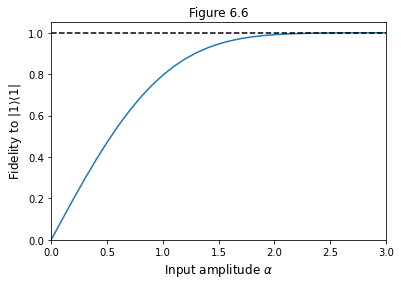

In [7]:
const_list_1 = numpy.full(len(alist), 1)

fig, ax = matplotlib.pyplot.subplots()

ax.plot(alist, fidlist, label="$\\gamma = 8.0$")
ax.plot(alist, const_list_1, color="black", linestyle="--")
ax.autoscale(tight=True)
ax.set(xlabel="Input amplitude $\\alpha$")
ax.set(title="Figure 6.6")
ax.set(ylabel="Fidelity to $|1\\rangle\\langle 1|$")

ax.set_ylim([0, 1.05]);
ax.set_xlim([0, 3.0]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.6: The fidelity of $\rho_a\left(t\rightarrow\infty\right)$ to single-photon state $|1\rangle\langle1|$ depends on initial coherent state amplitude $\alpha$ since the density matrix elements $\rho_{0, 0}$, $\rho_{0, 1}$ and $\rho_{1, 0}$ are constant in time.

### Figure 6.7 $\hat{A} = \hat{a}\left(\hat{n} - 2\right)$

In [4]:
options=qutip.Options(nsteps=10000)

# defining input parameters
N = 35 # hilbert space size
tlist = numpy.linspace(0, 1.0, 101) # times over which to solve
gamma = 8.0 # decay rate 
omega = 0.0 # free Hamiltonian frequency 
alphain = 3.0 # input coherent state amplitude

# defining operators
a = qutip.destroy(N) # annihilation operator
n = qutip.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/numpy.sqrt(2) # position operator. Equivalent to qutip.position(N)
p = -1j * (a - ad)/numpy.sqrt(2) # momentum operator. Equivalent to qutip.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qutip.coherent(N, alphain, method="analytic")

coplist = [numpy.sqrt(gamma) * a*(n - 2)]
result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)

# timing: 39.7s

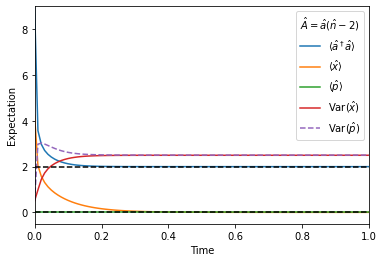

In [6]:
# graph of expectations

const_list_0 = numpy.full(len(tlist), 0)
const_list_2 = numpy.full(len(tlist), 2)

ymax = max(qutip.expect(n, result.states))
fig, ax = matplotlib.pyplot.subplots()

ax.plot(tlist, qutip.expect(n, result.states), label="$\\langle\\hat{a}^\\dagger \\hat{a} \\rangle$")
ax.plot(tlist, qutip.expect(x, result.states), label="$\\langle\\hat{x}\\rangle$")
ax.plot(tlist, qutip.expect(p, result.states), label="$\\langle\\hat{p}\\rangle$")
ax.plot(tlist, qutip.variance(x, result.states), label="Var($\\hat{x}$)")
ax.plot(tlist, qutip.variance(p, result.states), label="Var($\\hat{p}$)", linestyle="--")
ax.plot(tlist, const_list_0, color="black", linestyle="--")
ax.plot(tlist, const_list_2, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Expectation")
ax.legend(title = "$\\hat{A} = \\hat{a}\\left(\\hat{n} - 2\\right)$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.5,ymax]);

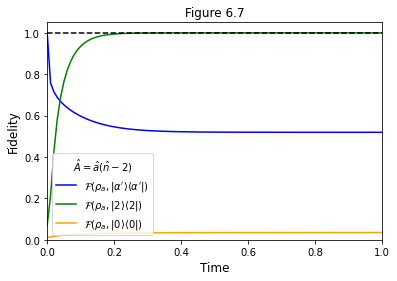

In [7]:
# graph of fidelities to target states

const_list_1 = numpy.full(len(tlist), 1)

# fidelity to equivalent coherent state
fid_list_coh = []
for idx, val in enumerate(result.states):
    fid_list_coh.append(qutip.fidelity(val, qutip.coherent(N, numpy.sqrt(qutip.expect(n, val)))))
    

fid_list_two = []
for idx, val in enumerate(result.states):
    fid_list_two.append(qutip.fidelity(val, qutip.fock(N, 2)))
    
fid_list_one = []
for idx, val in enumerate(result.states):
    fid_list_one.append(qutip.fidelity(val, qutip.fock(N, 1)))


fid_list_zero = []
for idx, val in enumerate(result.states):
    fid_list_zero.append(qutip.fidelity(val, qutip.fock(N, 0)))


fig, ax = matplotlib.pyplot.subplots()
    
ax.plot(tlist, fid_list_coh, label="$\\mathcal{F}\\left(\\rho_a, |\\alpha^\\prime\\rangle\\langle \\alpha^\\prime |\\right)$", color="blue")
ax.plot(tlist, fid_list_two, label="$\\mathcal{F}\\left(\\rho_a, |2\\rangle\\langle 2|\\right)$", color="green")
ax.plot(tlist, fid_list_zero, label="$\\mathcal{F}\\left(\\rho_a, |0\\rangle\\langle 0|\\right)$", color="orange")                      
ax.plot(tlist, const_list_1, linestyle="--", color="black")
ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
ax.set(title="Figure 6.7")
ax.set_ylim([0, 1.05]);
ax.legend(title = "$\\hat{A} = \\hat{a}\\left(\\hat{n}-2\\right)$", loc=0)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.7: $\hat{A} = \hat{a}\left(\hat{a}^\dagger\hat{a}-2\right)$. The steady-state of this loss operator is $|2\rangle\langle|$. The fidelity of $\rho_a$ to this two-photon state increases to $1$.

## Section 6.3

### Figure 6.8

In [4]:
# input parameters
options = qutip.Options(nsteps=10000)
N = 35 # hilbert space size 
tlist = numpy.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
alphain = 3.0 # input coherent state amplitude


# defining operators
a = qutip.destroy(N) # annihilation
ad = a.dag() # creation
n = qutip.num(N) # number
H = omega * ad * a # hamiltonian
x = (a + ad)/numpy.sqrt(2) # position operator. Equivalent to qutip.position(N)
p = -1j * (a - ad)/numpy.sqrt(2) # momentum operator. Equivalent to qutip.position(N)


# input state
psi0 = qutip.coherent(N, alphain, method="analytic")

def ncl_decay(gamma_1):
    coplist = [numpy.sqrt(gamma_3) * a * (n - 1), numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

In [5]:
# graph of fidelities to target states

const_list_1 = numpy.full(len(tlist), 1)

# gamma_1 = 0.0
states_0 = ncl_decay(0)
    
# fidelity to vacuum state
fid_list_vacuum_0 = []
for idx, val in enumerate(states_0):
    fid_list_vacuum_0.append(qutip.fidelity(val, qutip.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_0 = []
for idx, val in enumerate(states_0):
    fid_list_one_0.append(qutip.fidelity(val, qutip.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_0 = []
for idx, val in enumerate(states_0):
    fid_list_coh_0.append(qutip.fidelity(val, qutip.coherent(N, numpy.sqrt(qutip.expect(n, val)))))
    
# gamma_1 = 1.0
states_1 = ncl_decay(1)

    
# fidelity to vacuum state
fid_list_vacuum_1 = []
for idx, val in enumerate(states_1):
    fid_list_vacuum_1.append(qutip.fidelity(val, qutip.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_1 = []
for idx, val in enumerate(states_1):
    fid_list_one_1.append(qutip.fidelity(val, qutip.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_1 = []
for idx, val in enumerate(states_1):
    fid_list_coh_1.append(qutip.fidelity(val, qutip.coherent(N, numpy.sqrt(qutip.expect(n, val)))))   
    
# gamma_1 = 2.0
states_2 = ncl_decay(2)

    
# fidelity to vacuum state
fid_list_vacuum_2 = []
for idx, val in enumerate(states_2):
    fid_list_vacuum_2.append(qutip.fidelity(val, qutip.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_2 = []
for idx, val in enumerate(states_2):
    fid_list_one_2.append(qutip.fidelity(val, qutip.fock(N, 1)))

    
# fidelity to equivalent coherent state
fid_list_coh_2 = []
for idx, val in enumerate(states_2):
    fid_list_coh_2.append(qutip.fidelity(val, qutip.coherent(N, numpy.sqrt(qutip.expect(n, val)))))    
    
# gamma_1 = 20
states_20 = ncl_decay(20)

    
# fidelity to vacuum state
fid_list_vacuum_20 = []
for idx, val in enumerate(states_20):
    fid_list_vacuum_20.append(qutip.fidelity(val, qutip.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_20 = []
for idx, val in enumerate(states_20):
    fid_list_one_20.append(qutip.fidelity(val, qutip.fock(N, 1)))

# fidelity to equivalent coherent state
fid_list_coh_20 = []
for idx, val in enumerate(states_20):
    fid_list_coh_20.append(qutip.fidelity(val, qutip.coherent(N, numpy.sqrt(qutip.expect(n, val)))))

# timing: 2m 37s

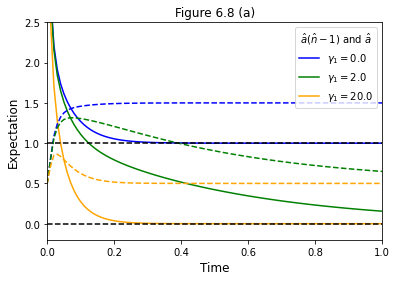

In [6]:
# graph of expectations

const_list_0 = numpy.full(len(tlist), 0)
const_list_1 = numpy.full(len(tlist), 1)

ymax = max(qutip.expect(n, states_1))
fig, ax = matplotlib.pyplot.subplots()

ax.plot(tlist, qutip.expect(n, states_0), color="blue", label="$\\gamma_1 = 0.0$")
ax.plot(tlist, qutip.expect(n, states_2), color="green", label="$\\gamma_1 = 2.0$")
ax.plot(tlist, qutip.expect(n, states_20), color="orange", label="$\\gamma_1 = 20.0$")

ax.plot(tlist, qutip.variance(x, states_0), color="blue" ,linestyle="--")
ax.plot(tlist, qutip.variance(x, states_2), color="green" ,linestyle="--")
ax.plot(tlist, qutip.variance(x, states_20), color="orange" ,linestyle="--")

ax.plot(tlist, const_list_0, color="black", linestyle="--")
ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Expectation")
ax.set(title="Figure 6.8 (a)")
ax.legend(title = "$\\hat{a}\\left(\\hat{n} - 1\\right)$ and $\hat{a}$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.2, 2.5]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

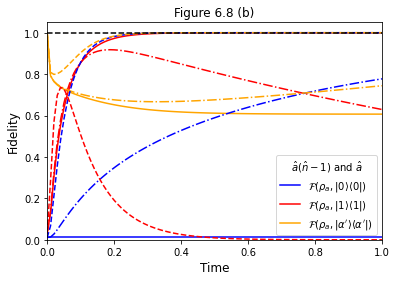

In [7]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(tlist, fid_list_vacuum_0, color="blue", label="$\\mathcal{F}\\left(\\rho_a, |0\\rangle\\langle 0|\\right)$")
ax.plot(tlist, fid_list_one_0, color="red", label="$\\mathcal{F}\\left(\\rho_a, |1\\rangle\\langle 1|\\right)$")
ax.plot(tlist, fid_list_coh_0, color="orange", label="$\\mathcal{F}\\left(\\rho_a, |\\alpha^\\prime\\rangle\\langle \\alpha^\\prime |\\right)$")


ax.plot(tlist, fid_list_vacuum_1, color="blue", linestyle="-.")
ax.plot(tlist, fid_list_one_1, color="red", linestyle="-.")
ax.plot(tlist, fid_list_coh_1, color="orange", linestyle="-.")

ax.plot(tlist, fid_list_vacuum_20, color="blue", linestyle="--")
ax.plot(tlist, fid_list_one_20, color="red", linestyle="--")
ax.plot(tlist, fid_list_coh_20, color="orange", linestyle="--")


ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
ax.set(title="Figure 6.8 (b)")
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}\\left(\\hat{n}-1\\right)$ and $\\hat{a}$", loc=0)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.8: NCL $\hat{a}\left(\hat{a}^\dagger \hat{a} - 1\right)$ and linear loss $\hat{a}$. Initial coherent state amplitude $\alpha = 3.0$ and $\gamma_{NCL} = 8.0$. (a) Operator expectation values. Solid: $\langle \hat{a}^\dagger \hat{a}\rangle$. The presence of linear loss $\gamma_1 > 0$ ensures that the photon number decays to $0$. Dashed: Var$\left(\hat{x}\right)$. Similarly, for $\gamma_1 > 0$ we see the variance in $x$ return to its initial value, hinting that our state is being pushed towards vacuum. (b) Fidelities of $\rho_a\left(t\right)$ against vacuum (blue), single-photon state (red) and coherent state with equivalent photon-number expectation (orange). Solid: $\gamma_1=0$. Dot-dashed: $\gamma_1 = 2$. Dashed: $\gamma_1 = 20$. The presence of linear loss pushes $\rho_a$ away from the single-photon state for $t > 0.1$. For $t < 0.1$ the system is dominated by NCL. Numerical method: direct integration.

### Figure 6.9

In [4]:
def max_fidelity(_stateslist):
    fid_list = []
    for idx, val in enumerate(_stateslist):
        fid_list.append(qutip.fidelity(val, qutip.fock(N, 1)))

    return max(fid_list)

# input parameters
options = qutip.Options(nsteps=10000)
N = 35 # hilbert space size 
tlist = numpy.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency


# defining operators
a = qutip.destroy(N) # annihilation
ad = a.dag() # creation
n = qutip.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qutip.coherent(N, alphain, method="analytic")
    coplist = [numpy.sqrt(gamma_3) * a * (n - 1), numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qutip.coherent(N, alphain, method="analytic")
    coplist = [numpy.sqrt(gamma_3) * a * (n - 1), numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

In [5]:
gam_list = numpy.arange(0.0, 21.0, 1.0);

In [6]:
alphaTest = 1.0;
max_fid_list_1 = []
for idx, val in enumerate(gam_list):
    max_fid_list_1.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

# timing: 52.8s

Progress: [####################] 100.0%


In [7]:
alphaTest = 2.0;
max_fid_list_2 = []
for idx, val in enumerate(gam_list):
    max_fid_list_2.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

# timing: 5m 58s

Progress: [####################] 100.0%


In [8]:
alphaTest = 4.0;
max_fid_list_4 = []
for idx, val in enumerate(gam_list):
    max_fid_list_4.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

# timing: 12m 56s

Progress: [####################] 100.0%


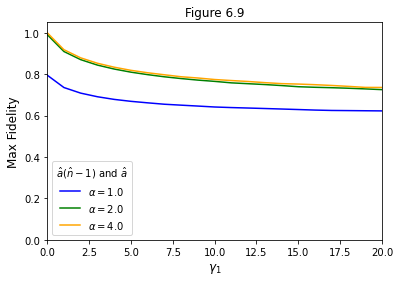

In [9]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(gam_list, max_fid_list_1, label="$\\alpha = 1.0$", color="blue")
ax.plot(gam_list, max_fid_list_2, label="$\\alpha = 2.0$", color="green")
ax.plot(gam_list, max_fid_list_4, label="$\\alpha = 4.0$", color="orange")



ax.autoscale(tight=True)
ax.set(xlabel="$\\gamma_1$")
ax.set(ylabel="Max Fidelity")
ax.set(title="Figure 6.9")
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}\\left(\\hat{n}-1\\right)$ and $\\hat{a}$", loc=0)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.9: Maximum attainable fidelity between $\rho_a$ and $|1\rangle\langle1|$ at different linear loss levels $\gamma_1$. Linear loss drives $\rho_a$ towards the vacuum and destroys the quantumness of our state, but over short times the fidelity to $|1\rangle\langle1|$ appears independent of $\gamma_1$, Fig. $6.8$. Here, we observe that after $\gamma_1 \approx 7.5$ the maximum attainable fidelity is practically independent of linear loss rate, while it does depend on $\alpha$. We shall exploit this later. Numerical method: direct integration.

### Figure 6.10

In [4]:
# input parameters
options = qutip.Options(nsteps=10000)
N = 35 # hilbert space size 
tlist = numpy.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency


# defining operators
a = qutip.destroy(N) # annihilation
ad = a.dag() # creation
n = qutip.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qutip.coherent(N, alphain, method="analytic")
    coplist = [numpy.sqrt(gamma_3) * a * (n - 1), numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def lin_decay(alphain, gamma_1):
    psi0 = qutip.coherent(N, alphain, method="analytic")
    coplist = [numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def mandelQ(_state):
    _num = qutip.expect(ad * ad * a * a, _state)
    _denom = qutip.expect(ad * a, _state)
    return (_num/_denom) - _denom

In [5]:
# generating some states evolution

states_list_0 = ncl_decay(3.0, 0.0)
states_list_1 = ncl_decay(3.0, 1.0)
states_list_2 = ncl_decay(3.0, 2.0)
states_list_5 = ncl_decay(3.0, 5.0)
states_list_20 = ncl_decay(3.0, 20.0)

states_list_lin = lin_decay(3.0, 5.0)

# timing 3m 8s

In [6]:
# generating some lists of mandel parameter

q_list_0 = mandelQ(states_list_0)
q_list_1 = mandelQ(states_list_1)
q_list_2 = mandelQ(states_list_2)
q_list_5 = mandelQ(states_list_5)
q_list_20 = mandelQ(states_list_20)

q_list_lin = mandelQ(states_list_lin)

# timing 41ms

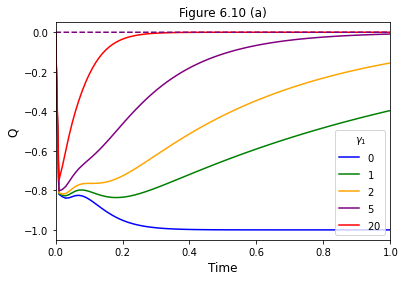

In [7]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(tlist, q_list_0, label="$0$", color="blue")
ax.plot(tlist, q_list_1, label="$1$", color="green")
ax.plot(tlist, q_list_2, label="$2$", color="orange")
ax.plot(tlist, q_list_5, label="$5$", color="purple")
ax.plot(tlist, q_list_20, label="$20$", color="red")

ax.plot(tlist, q_list_lin, color="purple", linestyle="--")


ax.set(xlabel="Time")
ax.set(ylabel="Q")
ax.set(title="Figure 6.10 (a)")
ax.legend(title = "$\\gamma_1$", loc=4)
ax.autoscale(tight=True)
ax.set_ylim([-1.05, 0.05]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

In [8]:
# input parameters
options = qutip.Options(nsteps=10000)
N = 35
 # hilbert space size 
tlist = numpy.linspace(0, 0.05, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
# alphain = 3.0 # input coherent state amplitude


# defining operators
a = qutip.destroy(N) # annihilation
ad = a.dag() # creation
n = qutip.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qutip.coherent(N, alphain, method="analytic")
    coplist = [numpy.sqrt(gamma_3) * a * (n - 1), numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def lin_decay(alphain, gamma_1):
    psi0 = qutip.coherent(N, alphain, method="analytic")
    coplist = [numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def mandelQ(_state):
    _num = qutip.expect(ad * ad * a * a, _state)
    _denom = qutip.expect(ad * a, _state)
    
#     if _denom != 0:
#         return (_num/_denom) - _denom
#     elif _denom == 0:
#         return 0
    return (_num/_denom) - _denom

In [9]:
# generating some states evolution

states_list_0 = ncl_decay(3.0, 0.0)
states_list_1 = ncl_decay(3.0, 1.0)
states_list_2 = ncl_decay(3.0, 2.0)
states_list_5 = ncl_decay(3.0, 5.0)
states_list_20 = ncl_decay(3.0, 20.0)
states_list_lin = lin_decay(3.0, 5.0)

# timing 13.6s

In [10]:
# generating some lists of mandel parameter

q_list_0 = mandelQ(states_list_0)
q_list_1 = mandelQ(states_list_1)
q_list_2 = mandelQ(states_list_2)
q_list_5 = mandelQ(states_list_5)
q_list_20 = mandelQ(states_list_20)

q_list_lin = mandelQ(states_list_lin)

# timing 41ms

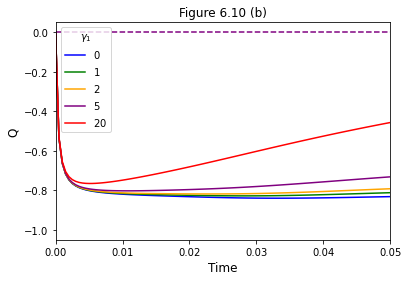

In [11]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(tlist, q_list_0, label="$0$", color="blue")
ax.plot(tlist, q_list_1, label="$1$", color="green")
ax.plot(tlist, q_list_2, label="$2$", color="orange")
ax.plot(tlist, q_list_5, label="$5$", color="purple")
ax.plot(tlist, q_list_20, label="$20$", color="red")

ax.plot(tlist, q_list_lin, color="purple", linestyle="--")


# ax.plot(tlist, const_list_0, color="black", linestyle="--")
# ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Q")
ax.set(title="Figure 6.10 (b)")
ax.legend(title = "$\\gamma_1$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-1.05, 0.05]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.10: Mandel $Q$ parameter under both NCL and linear loss. With $\gamma_1 = 0$, $Q \rightarrow -1$ as the system approaches $|1\rangle\langle1|$. For any $\gamma_1 > 0$, $Q\left(t\rightarrow\infty\right) \rightarrow 0$, but significant $Q < 0$ are still obtained for finite $t$. Solid: $\gamma_{NCL} \ne 0$. Dashed: $\gamma_{NCL} = 0$, i.e. just linear loss. Numerical method: direct integration. (a) and (b) show the same evolution, but (b) is displayed over a shorter timescale.

### Figure 6.11

In [6]:
# input parameters
options = qutip.Options(nsteps=10000)
N = 50
 # hilbert space size 
tlist = numpy.linspace(0, 0.02, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
# alphain = 3.0 # input coherent state amplitude


# defining operators
a = qutip.destroy(N) # annihilation
ad = a.dag() # creation
n = qutip.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qutip.coherent(N, alphain, method="analytic")
    coplist = [numpy.sqrt(gamma_3) * a * (n - 1), numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def lin_decay(alphain, gamma_1):
    psi0 = qutip.coherent(N, alphain, method="analytic")
    coplist = [numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def mandelQ(_state):
    _num = qutip.expect(ad * ad * a * a, _state)
    _denom = qutip.expect(ad * a, _state)
    
#     if _denom != 0:
#         return (_num/_denom) - _denom
#     elif _denom == 0:
#         return 0
    return (_num/_denom) - _denom

def bestQ(alphain, gamma_1):
    _states = ncl_decay(alphain, gamma_1)
    
    return min(mandelQ(_states))

In [7]:
gam_list = numpy.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0])

In [8]:
# alpha = 2
bestQ_list_2 = []
alpha_test = 2.0
for idx, val in enumerate(gam_list):
    bestQ_list_2.append(bestQ(alpha_test, val))
    update_progress(idx / len(gam_list))
    
update_progress(1)

# timing: 17.9s

Progress: [####################] 100.0%


In [9]:
# alpha = 3
bestQ_list_3 = []
alpha_test = 3.0
for idx, val in enumerate(gam_list):
    bestQ_list_3.append(bestQ(alpha_test, val))
    update_progress(idx / len(gam_list))
    
update_progress(1)

# timing: 1m 19s

Progress: [####################] 100.0%


In [10]:
# alpha = 4
bestQ_list_4 = []
alpha_test = 4.0
for idx, val in enumerate(gam_list):
    bestQ_list_4.append(bestQ(alpha_test, val))
    update_progress(idx / len(gam_list))
    
update_progress(1)

# timing: 20.4s

Progress: [####################] 100.0%


In [11]:
# alpha = 5
bestQ_list_5 = []
alpha_test = 5.0
for idx, val in enumerate(gam_list):
    bestQ_list_5.append(bestQ(alpha_test, val))
    update_progress(idx / len(gam_list))
    
update_progress(1)

# timing: 3m 2s

Progress: [####################] 100.0%


For $\alpha=8.0$ I have performed the same method as above with $|\mathcal{H}| = 100$ (i.e. `N=100`) . It took a while, so I've also provided the output so the figure can still be made without waiting for ages.

In [15]:
# alpha = 8
bestQ_list_8 = []
alpha_test = 8.0
for idx, val in enumerate(gam_list):
    bestQ_list_8.append(bestQ(alpha_test, val))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


In [14]:
# # dims=100

# # alpha = 8
# bestQ_list_8 = []
# alpha_test = 8.0
# for idx, val in enumerate(gam_list):
#     bestQ_list_8.append(bestQ(alpha_test, val))
#     update_progress(idx / len(gam_list))
    
# update_progress(1)

bestQ_list_8 = [-0.8327677383873613,
 -0.8314726622484669,
 -0.8301742521864941,
 -0.8288725285698655,
 -0.8275674622788018,
 -0.8262592055300997,
 -0.8249477218652428,
 -0.8236330057733716,
 -0.8223152312784745,
 -0.8209943285932328,
 -0.8196704490279649,
 -0.8183534033995123,
 -0.8173773684393641,
 -0.8165532736437047,
 -0.8158064795862621,
 -0.8151195751004905,
 -0.8123785845959595,
 -0.8104716929944256,
 -0.8090665556713614,
 -0.8079864327479469,
 -0.8071259949050118,
 -0.8064265867077847,
 -0.8058421227161761,
 -0.803945947355853,
 -0.8029219813587591]

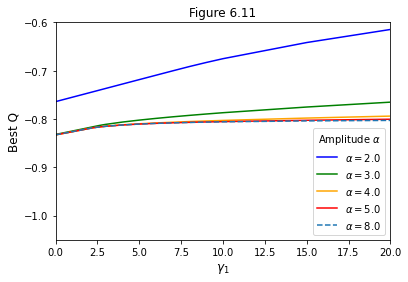

In [13]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(gam_list, bestQ_list_2, label="$\\alpha = 2.0$", color="blue")
ax.plot(gam_list, bestQ_list_3, label="$\\alpha = 3.0$", color="green")
ax.plot(gam_list, bestQ_list_4, label="$\\alpha = 4.0$", color="orange")
ax.plot(gam_list, bestQ_list_5, label="$\\alpha = 5.0$", color="red")
ax.plot(gam_list, bestQ_list_8, label="$\\alpha = 8.0$", linestyle="--")

ax.set(xlabel="$\\gamma_1$")
ax.set(ylabel="Best Q")
ax.set(title="Figure 6.11")
ax.legend(title = "Amplitude $\\alpha$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-1.05, -0.6]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)


Figure 6.11: The best attainable value of Mandel parameter $Q$ is approximately independent of $\gamma_1$ when the loss rate is nonzero. Larger $\alpha$ allows for better $Q$ to be reached. Numerical method: direct integration ($\alpha = 2.0, 3.0, 4.0, 5.0)$; quantum Monte Carlo ($\alpha = 8.0$).

### Figure 6.12

In [4]:
# input parameters
options = qutip.Options(nsteps=10000)
N = 35 # hilbert space size 
tlist = numpy.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
alphain = 3.0 # input coherent state amplitude


# defining operators
a = qutip.destroy(N) # annihilation
ad = a.dag() # creation
n = qutip.num(N) # number
H = omega * ad * a # hamiltonian
x = (a + ad)/numpy.sqrt(2) # position operator. Equivalent to qutip.position(N)
p = -1j * (a - ad)/numpy.sqrt(2) # momentum operator. Equivalent to qutip.position(N)


# input state
psi0 = qutip.coherent(N, alphain, method="operator")

def ncl_decay(gamma_1):
    coplist = [numpy.sqrt(gamma_3) * a * (n - 1), numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

In [5]:
tlist = numpy.linspace(0, 0.002, 101) # times over which to solve

def ncl_decay_2(dims, alphain, gamma_1=0.0, gamma_3=8.0):
    options = qutip.Options(nsteps=25000)
    N = dims # hilbert space size 
#     tlist = numpy.linspace(0, 0.1, 101) # times over which to solve
    gamma_3 = 8.0 # NCL rate
    omega = 0.0 # free Hamiltonian frequency


    # defining operators
    a = qutip.destroy(N) # annihilation
    ad = a.dag() # creation
    n = qutip.num(N) # number
    H = omega * ad * a # hamiltonian
    x = (a + ad)/numpy.sqrt(2) # position operator. Equivalent to qutip.position(N)
    p = -1j * (a - ad)/numpy.sqrt(2) # momentum operator. Equivalent to qutip.position(N)


    # input state
    psi0 = qutip.coherent(N, alphain, method="analytic")
    
    # solving
    coplist = [numpy.sqrt(gamma_3) * a * (n - 1), numpy.sqrt(gamma_1) * a]
    result = qutip.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

In [6]:
sol_3 = ncl_decay_2(35, 3.0)
sol_4 = ncl_decay_2(40, 4.0)
sol_5 = ncl_decay_2(50, 5.0)
sol_6 = ncl_decay_2(60, 6.0);

# timing: 1.42s

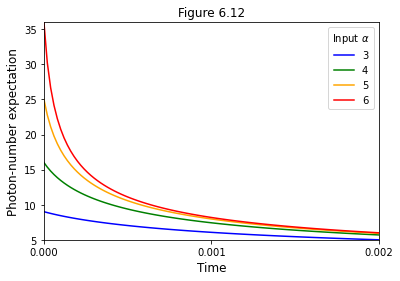

In [7]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(tlist, qutip.expect(qutip.num(35), sol_3), label = "3", color="blue")
ax.plot(tlist, qutip.expect(qutip.num(40), sol_4), label = "4", color="green")
ax.plot(tlist, qutip.expect(qutip.num(50), sol_5), label = "5", color="orange")
ax.plot(tlist, qutip.expect(qutip.num(60), sol_6), label = "6", color="red")

ax.set(xlabel="Time")
ax.set(ylabel="Photon-number expectation")
ax.set(title="Figure 6.12")
ax.legend(title = "Input $\\alpha$", loc=0)
ax.autoscale(tight=True)

matplotlib.pyplot.xticks([0.000, 0.001, 0.002]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.12: NCL induces intensity-dependent decay rates, and so states with initially different $\langle \hat{n}\rangle$ quickly decay to a level where they possess the same average photon number. This is a key demonstration of NCL. Linear loss rate $\gamma_1 = 0.0$. Numerical method: direct integration.

### Figure 6.13

In [4]:
times = numpy.linspace(0, 0.02, 100)

def single_mode_solver(method, dims, alpha_in, gamma_1, gamma_2, gamma_3, times=numpy.linspace(0, 0.02, 100)):
    
    # parameters
    omega = 0
    ntraj = 2000
    
    # input state
    psi0 = qutip.coherent(dims, alpha_in, method="analytic")
    
    # defining operators
    a = qutip.destroy(dims)
    ad = a.dag()
    n = qutip.num(dims)
    
    # collapse operators
    c_op_list = [numpy.sqrt(gamma_1) * a, numpy.sqrt(gamma_2) * a * a, numpy.sqrt(gamma_3) * a * (n-1)]
    
    # Hamiltonian
    H = omega * ad * a
    
    if method == "me":
        rho0 = qutip.ket2dm(psi0)
        e_op_list = []
        return qutip.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
        e_op_list = [n, n**2]
        return qutip.mcsolve(H, psi0, times, c_op_list, e_op_list, ntraj=ntraj)
    
    
def mandelQ(expectin): 
    """
    Input: output of single_mode_solver (or single_mode_solver_modified)
    Output: mandel Q parameter at each timestep
    """
    
    _num = expectin.expect[1] - expectin.expect[0]**2
    _denom = expectin.expect[0]
    
    return (_num/_denom)-1

In [5]:
def param2gamma2(U, Gamma, gamma_1):
    gamma_2 = (U**2)/(16 * (Gamma + gamma_1))
    return gamma_2

def param2gamma3(U, Gamma, gamma_1):
    gamma_3 = (U**2)/(4 * (Gamma + gamma_1))
    return gamma_3

gamma_2_test = param2gamma2(2.0, 432, 0)
gamma_3_test = param2gamma3(2.0, 430, 0)

In [ ]:
sol100 = single_mode_solver("mc", 140, 10, 0.0, gamma_2_test, gamma_3_test)
sol300 = single_mode_solver("mc", 364, numpy.sqrt(300), 0.0, gamma_2_test, gamma_3_test)
sol500 = single_mode_solver("mc", 581, numpy.sqrt(500), 0.0, gamma_2_test, gamma_3_test)
sol700 = single_mode_solver("mc", 794, numpy.sqrt(700), 0.0, gamma_2_test, gamma_3_test)

# timing: 6m 38s

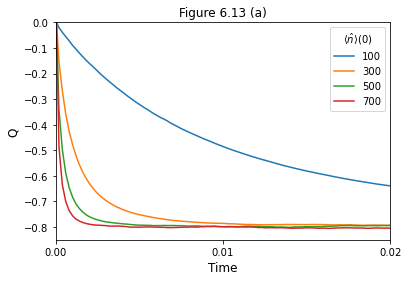

In [9]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(times, mandelQ(sol100), label="100")
ax.plot(times, mandelQ(sol300), label="300")
ax.plot(times, mandelQ(sol500), label="500")
ax.plot(times, mandelQ(sol700), label="700")


ax.set(xlabel="Time")
ax.set(ylabel="Q")
ax.set(title="Figure 6.13 (a)")
ax.legend(title = "$\\langle \\hat{n} \\rangle\\left(0\\right)$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.85, 0.0]);

matplotlib.pyplot.xticks([0.0, 0.01, 0.02]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

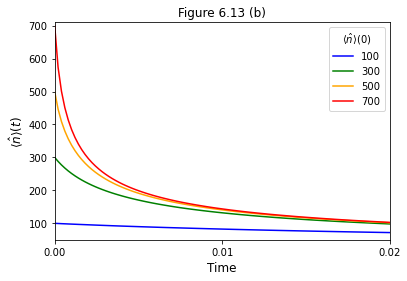

In [10]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(times, sol100.expect[0], label="100", color="blue")
ax.plot(times, sol300.expect[0], label="300", color="green")
ax.plot(times, sol500.expect[0], label="500", color="orange")
ax.plot(times, sol700.expect[0], label="700", color="red")


ax.set(xlabel="Time")
ax.set(ylabel="$\\langle \\hat{n} \\rangle \\left(t\\right)$")
ax.set(title="Figure 6.13 (b)")
ax.legend(title = "$\\langle \\hat{n} \\rangle\\left(0\\right)$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([50, 710]);

matplotlib.pyplot.xticks([0.00, 0.01, 0.02]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.13: Signature behavious of NCL in a system obeying Eq. 6.27 with $\gamma_2 = 0.0005$, $\gamma_{NCL} = 0.002$ and an initial coherent state with average photon number $\langle \hat{n}\rangle\left(0\right)$. (a) Generation of sub-Poissonian light, as evidenced by $Q < 0$. Linear loss $\gamma_1 = 0$ and so the maximum value of $|Q|$ is obtained for most choices of $\alpha$, but the time taken to reach maximum $Q$ decreases as initial $\alpha$ increases. (b) Nonlinear decay of photon-number expectation $\langle \hat{n}\rangle$. Intensity-dependent loss causes states with large photon numbers to decay very quickly, while states with similar photon numbers experience similar decay rate. Numerical method: quantum Monte Carlo.

### Figure 6.14

In [5]:
times = numpy.linspace(0, 0.02, 100)

def single_mode_solver(method, dims, alpha_in, gamma_1, gamma_2, gamma_3, times=numpy.linspace(0, 0.02, 100)):
    
    # parameters
    omega = 0
    ntraj = 2000
    
    # input state
    psi0 = qutip.coherent(dims, alpha_in, method="analytic")
    
    # defining operators
    a = qutip.destroy(dims)
    ad = a.dag()
    n = qutip.num(dims)
    
    # collapse operators
    c_op_list = [numpy.sqrt(gamma_1) * a, numpy.sqrt(gamma_2) * a * a, numpy.sqrt(gamma_3) * a * (n-1)]
    
    # Hamiltonian
    H = omega * ad * a
    
    if method == "me":
        rho0 = qutip.ket2dm(psi0)
        e_op_list = []
        return qutip.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
        e_op_list = [n, n**2]
        return qutip.mcsolve(H, psi0, times, c_op_list, e_op_list, ntraj=ntraj)
    
    
def mandelQ(expectin): 
    """
    Input: output of single_mode_solver (or single_mode_solver_modified)
    Output: mandel Q parameter at each timestep
    """
    
    _num = expectin.expect[1] - expectin.expect[0]**2
    _denom = expectin.expect[0]
    
    return (_num/_denom)-1

In [6]:
def param2gamma2(U, Gamma, gamma_1):
    gamma_2 = (U**2)/(16 * (Gamma + gamma_1))
    return gamma_2

def param2gamma3(U, Gamma, gamma_1):
    gamma_3 = (U**2)/(4 * (Gamma + gamma_1))
    return gamma_3

gamma_2_test = param2gamma2(2.0, 432, 0)
gamma_3_test = param2gamma3(2.0, 430, 0)

In [7]:
gamma_2_test = param2gamma2(2, 432, 0)
gamma_3_test = param2gamma3(2, 432, 0)

In [ ]:
sol500_0 = single_mode_solver("mc", 581, numpy.sqrt(500), 0.0, gamma_2_test, gamma_3_test)
sol500_20 = single_mode_solver("mc", 581, numpy.sqrt(500), 20.0, gamma_2_test, gamma_3_test)
sol500_200 = single_mode_solver("mc", 581, numpy.sqrt(500), 200.0, gamma_2_test, gamma_3_test)
sol500_400 = single_mode_solver("mc", 581, numpy.sqrt(500), 400.0, gamma_2_test, gamma_3_test)

# timing: 9m 45s

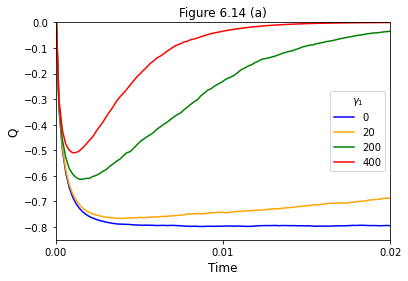

In [9]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(times, mandelQ(sol500_0), label="0", color="blue")
ax.plot(times, mandelQ(sol500_20), label="20", color="orange")
ax.plot(times, mandelQ(sol500_200), label="200", color="green")
ax.plot(times, mandelQ(sol500_400), label="400", color="red")


ax.set(xlabel="Time")
ax.set(ylabel="Q")
ax.set(title="Figure 6.14 (a)")
ax.legend(title = "$\\gamma_1$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.85, 0.0]);

matplotlib.pyplot.xticks([0.0, 0.01, 0.02]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

In [10]:
gamma_1_test = 200
gamma_2_test = param2gamma2(2, 432, 0)
gamma_3_test = param2gamma3(2, 432, 0)

In [ ]:
sol100 = single_mode_solver("mc", 140, 10, gamma_1_test, gamma_2_test, gamma_3_test)
sol300 = single_mode_solver("mc", 364, numpy.sqrt(300), gamma_1_test, gamma_2_test, gamma_3_test)
sol500 = single_mode_solver("mc", 581, numpy.sqrt(500), gamma_1_test, gamma_2_test, gamma_3_test)
sol700 = single_mode_solver("mc", 794, numpy.sqrt(700), gamma_1_test, gamma_2_test, gamma_3_test)

# timing: 8m 21s

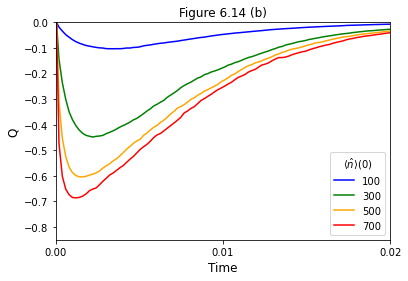

In [12]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(times, mandelQ(sol100), label="100", color="blue")
ax.plot(times, mandelQ(sol300), label="300", color="green")
ax.plot(times, mandelQ(sol500), label="500", color="orange")
ax.plot(times, mandelQ(sol700), label="700", color="red")

ax.set(xlabel="Time")
ax.set(ylabel="Q")
ax.set(title="Figure 6.14 (b)")
ax.legend(title = "$\\langle \hat{n} \\rangle \\left(0\\right)$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.85, 0.0]);

matplotlib.pyplot.xticks([0.0, 0.01, 0.02]);

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

Figure 6.14: Evolution of the Mandel Q parameter as $\gamma_1$ and $\alpha$ are varied in a system obeying Eq. $6.27$ with $\gamma_2 = 0.0005$, $\gamma_{NCL} = 0.002$ and an initial coherent state with average photon number $\langle \hat{n}\rangle\left(0\right)$. (a) Constant $\langle \hat{n}\rangle\left(0\right)=500$ photons and varying linear loss $\gamma_1$. Larger $\gamma_1$ causes progressively smaller values of $|Q|$ to be obtained, c.f. Fig. $6.11$, although the dynamics are practically independent of $\gamma_1$ for small times. (b) Constant $\gamma_1=200$. Even with large linear loss, larger $|Q|$ may be obtained by starting with a brighter coherent state (larger $\langle \hat{n}\rangle\left(0\right)$). Numerical method: quantum Monte Carlo.

### Figure 6.18

In [5]:
times = numpy.linspace(0, 0.1, 100)
def single_mode_solver(method, dims, alpha_in, gamma_1, Gamma, U, times = times):
    sigma_1 = (3 * U) / 8 
    sigma_2 = U / 2
    sigma_3 = (-3 * U) / 8 
    gamma_2 = (U**2)/(16 * (Gamma + gamma_1))
    gamma_3 = (U**2)/(4 * (Gamma + gamma_1))
    
    psi0 = qutip.coherent(dims, alpha_in, method="analytic")
#     times = numpy.linspace(0, 10, 100)

    s_minus = qutip.destroy(dims)
    n_minus = s_minus.dag() * s_minus
    c_op_list = [numpy.sqrt(gamma_1) * s_minus, numpy.sqrt(gamma_2) * s_minus**2, numpy.sqrt(gamma_3) *  n_minus * s_minus]
    H = sigma_1 * (n_minus**2) + sigma_3 * n_minus # possibly I need to scale H by hbar or something
#     e_op_list = []

#     opts = Options()
#     opts.nsteps = 3000
    if method == "me":
        rho0 = qutip.ket2dm(psi0)
        e_op_list = []
        return qutip.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
#         ntraj = 500
        e_op_list = [n_minus]
        return qutip.mcsolve(H, psi0, times, c_op_list, [n_minus, n_minus**2], ntraj=250)
    
    
def two_mode_solver(method, dims, alpha_in, gamma_1, Gamma, U, times = times, ntraj=250):
    # quantities with optimal couplings chosen
    sigma_1 = (3 * U) / 8 
    sigma_2 = U / 2
    sigma_3 = (-3 * U) / 8 
    sigma_4 = (sigma_2/4)
    sigma_5 = U/4
    
    newgamma2 = (Gamma + gamma_1)
    
#     gamma_2 = (U**2)/(16 * (Gamma + gamma_1))

    # single-mode operators
    a = qutip.destroy(dims)
    ad = a.dag()
    n = qutip.num(dims)
    one = qutip.qeye(dims)
    
    # composite-mode operatos
        # let s_minus be mode 1 and s_plus be mode 2 (for similarity with mathematica code)

    s_minus = qutip.tensor(a, one)
    s_minus_dag = s_minus.dag()
    s_plus = qutip.tensor(one, a)
    s_plus_dag = s_plus.dag()
    
    n_minus = qutip.tensor(n, one)
    n_plus = qutip.tensor(one, n)
    
    # list of collapse operators
    c_op_list = [numpy.sqrt(gamma_1) * s_minus, numpy.sqrt(newgamma2) * s_plus]
    
    # defining Hamiltonian
    H_self = sigma_1 * (n_plus * n_plus + n_minus * n_minus) + sigma_2 * n_plus * n_minus + sigma_3 * (n_plus + n_minus)
    H_int = sigma_4 * (s_plus_dag * s_minus)*(s_plus_dag * s_minus) + sigma_5 * s_plus_dag * s_minus * (n_minus - n_plus - 1)
    H_int_hc = sigma_4 * (s_minus_dag * s_plus) * (s_minus_dag * s_plus) + sigma_5 * s_minus_dag * s_plus * (n_minus - n_plus - 1)
    H = H_self + H_int + H_int_hc
    
    e_op_list = [n_minus, n_plus]
    
    # let's put a coherent state into mode s_-
    psi_s_minus = qutip.coherent(dims, alpha_in, method="analytic")
    vac = qutip.basis(dims, 0)
    psi0 = qutip.tensor(psi_s_minus, vac)
    
    return qutip.mcsolve(H, psi0, times, c_op_list, e_op_list, ntraj=ntraj)

In [6]:
# universal parameters
gamma_1 = 10.0
Gamma = 432.0
U = 2.0
times = numpy.linspace(0, 0.1, 100)

In [142]:
folderout = os.getcwd() + "\\two_mode_state_out\\"
def myfileout(alpha_in, dims):
    return folderout+"two_mode_solver-dims=" + str(dims)+",alpha="+str(alpha_in)+".dat"

def myfilein(alpha_in, dims):
    _filein = myfileout(numpy.round(alpha_in), dims)
    return qutip.qload(_filein)
    

In [143]:
folderout = os.getcwd() + "\\two_mode_state_out\\"
if os.path.isdir(folderout)==False:
    os.mkdir(folderout)
    print("Folder created")

In [144]:
dims = 50
alpha_in = 5.0
sol_25_1 = single_mode_solver("mc", dims, alpha_in, gamma_1, Gamma, U)
# sol_25_2 = two_mode_solver("mc", dims, alpha_in, gamma_1, Gamma, U)
sol_25_2 = myfilein(alpha_in, dims)

10.0%. Run time:   2.50s. Est. time left: 00:00:00:22
20.0%. Run time:   2.58s. Est. time left: 00:00:00:10
30.0%. Run time:   2.63s. Est. time left: 00:00:00:06
40.0%. Run time:   2.69s. Est. time left: 00:00:00:04
50.0%. Run time:   2.75s. Est. time left: 00:00:00:02
60.0%. Run time:   2.81s. Est. time left: 00:00:00:01
70.0%. Run time:   2.87s. Est. time left: 00:00:00:01
80.0%. Run time:   2.93s. Est. time left: 00:00:00:00
90.0%. Run time:   2.98s. Est. time left: 00:00:00:00
100.0%. Run time:   3.03s. Est. time left: 00:00:00:00
Total run time:   3.20s
Loaded Result object:
Result object with mcsolve data.
--------------------------------
expect = True
num_expect = 2, num_collapse = 2, ntraj = 250


In [145]:
dims = 200
alpha_in = numpy.sqrt(150)
sol_150_1 = single_mode_solver("mc", dims, alpha_in, gamma_1, Gamma, U)
# sol_150_2 = two_mode_solver("mc", dims, alpha_in, gamma_1, Gamma, U)

# qt.qsave(sol_150_2, myfileout(numpy.round(alpha_in), dims))

sol_150_2 = myfilein(alpha_in, dims)

10.0%. Run time:   2.68s. Est. time left: 00:00:00:24
20.0%. Run time:   3.15s. Est. time left: 00:00:00:12
30.0%. Run time:   3.48s. Est. time left: 00:00:00:08
40.0%. Run time:   3.94s. Est. time left: 00:00:00:05
50.0%. Run time:   4.25s. Est. time left: 00:00:00:04
60.0%. Run time:   4.73s. Est. time left: 00:00:00:03
70.0%. Run time:   5.06s. Est. time left: 00:00:00:02
80.0%. Run time:   5.52s. Est. time left: 00:00:00:01
90.0%. Run time:   5.88s. Est. time left: 00:00:00:00
100.0%. Run time:   6.25s. Est. time left: 00:00:00:00
Total run time:   6.38s
Loaded Result object:
Result object with mcsolve data.
--------------------------------
expect = True
num_expect = 2, num_collapse = 2, ntraj = 250


In [146]:
dims = 260
alpha_in = numpy.sqrt(200)
sol_200_1 = single_mode_solver("mc", dims, alpha_in, gamma_1, Gamma, U)
# sol_200_2 = two_mode_solver("mc", dims, alpha_in, gamma_1, Gamma, U)

# qt.qsave(sol_200_2, myfileout(numpy.round(alpha_in), dims))

sol_200_2 = myfilein(alpha_in, dims)

10.0%. Run time:   2.94s. Est. time left: 00:00:00:26
20.0%. Run time:   3.66s. Est. time left: 00:00:00:14
30.0%. Run time:   4.08s. Est. time left: 00:00:00:09
40.0%. Run time:   4.79s. Est. time left: 00:00:00:07
50.0%. Run time:   5.22s. Est. time left: 00:00:00:05
60.0%. Run time:   5.93s. Est. time left: 00:00:00:03
70.0%. Run time:   6.36s. Est. time left: 00:00:00:02
80.0%. Run time:   7.06s. Est. time left: 00:00:00:01
90.0%. Run time:   7.72s. Est. time left: 00:00:00:00
100.0%. Run time:   8.10s. Est. time left: 00:00:00:00
Total run time:   8.28s
Loaded Result object:
Result object with mcsolve data.
--------------------------------
expect = True
num_expect = 2, num_collapse = 2, ntraj = 250


In [147]:
dims = 364
alpha_in = numpy.sqrt(300)
sol_300_1 = single_mode_solver("mc", dims, alpha_in, gamma_1, Gamma, U)
# sol_300_2 = two_mode_solver("mc", dims, alpha_in, gamma_1, Gamma, U)

# qt.qsave(sol_300_2, myfileout(numpy.round(alpha_in), dims))

sol_300_2 = myfilein(alpha_in, dims)

10.0%. Run time:   4.16s. Est. time left: 00:00:00:37
20.0%. Run time:   5.87s. Est. time left: 00:00:00:23
30.0%. Run time:   6.92s. Est. time left: 00:00:00:16
40.0%. Run time:   8.58s. Est. time left: 00:00:00:12
50.0%. Run time:   9.85s. Est. time left: 00:00:00:09
60.0%. Run time:  11.34s. Est. time left: 00:00:00:07
70.0%. Run time:  12.72s. Est. time left: 00:00:00:05
80.0%. Run time:  14.18s. Est. time left: 00:00:00:03
90.0%. Run time:  15.89s. Est. time left: 00:00:00:01
100.0%. Run time:  17.16s. Est. time left: 00:00:00:00
Total run time:  17.29s
Loaded Result object:
Result object with mcsolve data.
--------------------------------
expect = True
num_expect = 2, num_collapse = 2, ntraj = 250


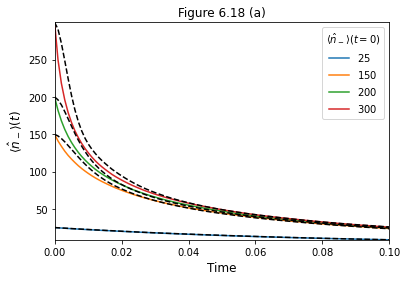

In [149]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(times, sol_25_1.expect[0], label="$25$")
ax.plot(times, sol_150_1.expect[0], label="$150$")
ax.plot(times, sol_200_1.expect[0], label="$200$")
ax.plot(times, sol_300_1.expect[0], label="$300$")

ax.plot(times, sol_25_2.expect[0], linestyle="--", color="black")
ax.plot(times, sol_150_2.expect[0], linestyle="--", color="black")
ax.plot(times, sol_200_2.expect[0], linestyle="--", color="black")
ax.plot(times, sol_300_2.expect[0], linestyle="--", color="black")


ax.set(xlabel="Time")
ax.set(ylabel="$\\langle \\hat{n}_-\\rangle\\left( t\\right)$")
ax.set(title="Figure 6.18 (a)")
ax.legend(title = "$\\langle \\hat{n}_- \\rangle \\left(t=0\\right)$", loc=0)
ax.autoscale(tight=True)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)


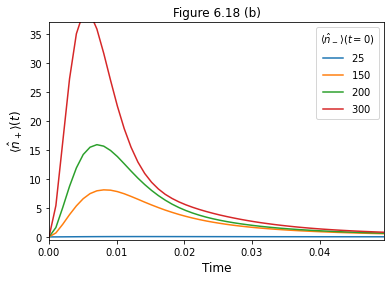

In [150]:
fig, ax = matplotlib.pyplot.subplots()

ax.plot(times[:50], sol_25_2.expect[1][:50], label="$25$")
ax.plot(times[:50], sol_150_2.expect[1][:50], label="$150$")
ax.plot(times[:50], sol_200_2.expect[1][:50], label="$200$")
ax.plot(times[:50], sol_300_2.expect[1][:50], label="$300$")

# ax.plot(times, sol_25_2.expect[1], linestyle="--", color="black")
# ax.plot(times, sol_150_2.expect[1], linestyle="--", color="black")
# ax.plot(times, sol_200_2.expect[1], linestyle="--", color="black")
# ax.plot(times, sol_300_2.expect[1], linestyle="--", color="black")


ax.set(xlabel="Time")
ax.set(ylabel="$\\langle \\hat{n}_+\\rangle\\left( t\\right)$")
ax.set(title="Figure 6.18 (b)")
ax.legend(title = "$\\langle \\hat{n}_- \\rangle \\left(t=0\\right)$", loc=0)
ax.autoscale(tight=True)
ax.set(ylim=[-0.5, 37])

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)


## Appendix E

### Figure E.1

In [156]:
times=numpy.linspace(0, 0.5, 100)
def single_mode_solver(method, dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=500, times=times):
    
    # parameters
    omega = 0
#     ntraj = 500
    
    # input state
    psi0 = qutip.coherent(dims, alpha_in, method="analytic")
    
    # defining operators
    a = qutip.destroy(dims)
    ad = a.dag()
    n = qutip.num(dims)
    
    # collapse operators
    c_op_list = [numpy.sqrt(gamma_1) * a, numpy.sqrt(gamma_2) * a * a, numpy.sqrt(gamma_3) * a * (n-1)]
    
    # Hamiltonian
    H = omega * ad * a
    
    if method == "me":
        rho0 = qutip.ket2dm(psi0)
        e_op_list = []
        return qutip.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
        e_op_list = [n]
        return qutip.mcsolve(H, psi0, times, c_op_list, e_op_list, ntraj=ntraj)

In [177]:
dims = 100
alpha_in = 5.0
gamma_1 = 0.0
gamma_2 = 0.0005
gamma_3 = 0.002
sol_DI = single_mode_solver("me", dims, alpha_in, gamma_1, gamma_2, gamma_3);

In [175]:
sol_QMC_10 = single_mode_solver("mc", dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=10);
sol_QMC_25 = single_mode_solver("mc", dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=25);
sol_QMC_50 = single_mode_solver("mc", dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=50);
sol_QMC_500 = single_mode_solver("mc", dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=500);

10.0%. Run time:   1.47s. Est. time left: 00:00:00:13
20.0%. Run time:   1.49s. Est. time left: 00:00:00:05
30.0%. Run time:   1.54s. Est. time left: 00:00:00:03
40.0%. Run time:   1.56s. Est. time left: 00:00:00:02
50.0%. Run time:   1.56s. Est. time left: 00:00:00:01
60.0%. Run time:   1.57s. Est. time left: 00:00:00:01
70.0%. Run time:   1.57s. Est. time left: 00:00:00:00
80.0%. Run time:   1.57s. Est. time left: 00:00:00:00
90.0%. Run time:   1.61s. Est. time left: 00:00:00:00
100.0%. Run time:   1.61s. Est. time left: 00:00:00:00
Total run time:   1.71s
12.0%. Run time:   2.12s. Est. time left: 00:00:00:15
20.0%. Run time:   2.14s. Est. time left: 00:00:00:08
32.0%. Run time:   2.17s. Est. time left: 00:00:00:04
40.0%. Run time:   2.19s. Est. time left: 00:00:00:03
52.0%. Run time:   2.20s. Est. time left: 00:00:00:02
60.0%. Run time:   2.20s. Est. time left: 00:00:00:01
72.0%. Run time:   2.22s. Est. time left: 00:00:00:00
80.0%. Run time:   2.22s. Est. time left: 00:00:00:00
92.

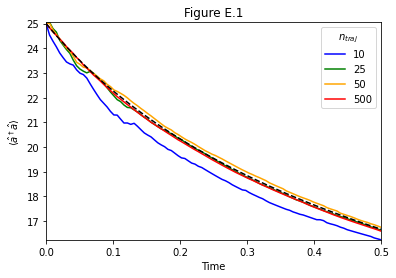

In [179]:
fig, ax = matplotlib.pyplot.subplots()


ax.plot(times, sol_QMC_10.expect[0], label="10", color="blue")
ax.plot(times, sol_QMC_25.expect[0], label="25", color="green")
ax.plot(times, sol_QMC_50.expect[0], label="50", color="orange")
ax.plot(times, sol_QMC_500.expect[0], label="500", color="red")
ax.plot(times, qutip.expect(qutip.num(dims), sol_DI), linestyle="--", color="black")

ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="$\\langle \\hat{a}^\\dagger \\hat{a} \\rangle$")
ax.set(title="Figure E.1")
ax.legend(title = "$n_{traj}$", loc=0)
